**Author:** C Mitchell

This notebook is for visualizing the PIC results for the different treatments and coccolithophore cultures   

Colors were taken from the Tol color palette here: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255

# Load modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random

# Initialize for culture grouping

In [2]:
fulldf = pd.read_csv('data/03-PIC-blank-corrected.csv')
fulldf = fulldf.assign(label= fulldf.Code.str[:-1])
fulldf = fulldf.assign(culture_id = fulldf.label.str[0])
fulldf = fulldf.assign(treatment_id = fulldf.label.str[1:])

In [3]:
fulldf['treatment_id'] = fulldf['treatment_id'].replace('AX',1)
fulldf['treatment_id']  = fulldf['treatment_id'].replace('AY',2)
fulldf['treatment_id']  = fulldf['treatment_id'].replace('BX',3)
fulldf['treatment_id'] = fulldf['treatment_id'].replace('BY',4)

/var/tmp/pbs.816557.cfe/ipykernel_14232/836373161.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldf['treatment_id'] = fulldf['treatment_id'].replace('BY',4)


In [5]:
offset = 0.22
culturekey = {'C' : -2*offset, 'U' : -offset,
             'S' : 0, 'L' : offset, 'N' : offset*2}
culturecolors = ['#332288','#44AA99','#DDCC77','#CC6677','#882255']
culturestrains = {'C' : '$\t{C. leptoporus}$ 2N/HET', 'U' : '$\t{U. foliosa}$ 2N/HET',
             'S' : '$\t{S. pulchra}$ N/HOL', 'L' : '$\t{C. leptoporus}$ N/HOL', 'N' : '$\t{C. leptoporus}$ N/non-c'}
culturesym = {'C' : '^', 'U' : 'v',
             'S' : 's', 'L' : 'd', 'N' : 'P'}

# Initialize for the protocol grouping

In [9]:
fulldf2 = fulldf.copy()
fulldf2 = fulldf.assign(treatment_id = fulldf.label.str[1:])

In [10]:
offset = 0.1
treatmentkey = {'AX' : -3*offset, 'AY' : -offset,
             'BX' : offset, 'BY' : offset*3}
treatmentcolors = ['#000000','#E69F00','#56B4E9','#0072B2']
treatments = {'AX' : r'0.4 $\mu$m & NH$_4$OH', 'AY' : r'0.4 $\mu$m & K$_2$B$_4$O$_7$',
             'BX' : r'0.8 $\mu$m & NH$_4$OH', 'BY' : r'0.8 $\mu$m & K$_2$B$_4$O$_7$'}
treatmentsym = {'AX' : '^', 'AY' : 'v',
             'BX' : 's', 'BY' : 'd'}
cultureids = ['C','U','S','L','N']

# Plotting

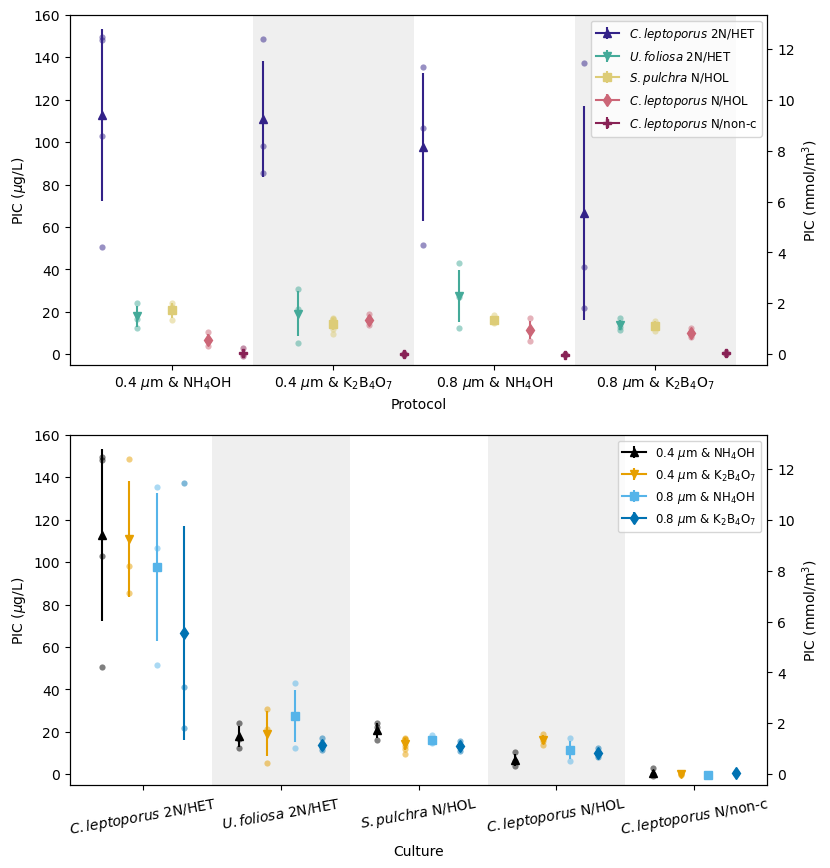

In [11]:
f, ax = plt.subplots(2,1,figsize=(9,10))

for it in range(1,5):
    subdf = fulldf.loc[fulldf['treatment_id'] == it]
    
    for ic,(key,val) in enumerate(culturekey.items()):
        subsubdf = subdf.loc[subdf['culture_id'] == key]

        y = subsubdf['PIC ug/l']
        ax[0].errorbar(it+val,np.mean(y),yerr=np.std(y),marker=culturesym[key],color = culturecolors[ic],label=key)
        ax[0].set_ylim([-5,160])

# second y-axis
ax2 = ax[0].twinx()
for it in range(1,5):
    subdf = fulldf.loc[fulldf['treatment_id'] == it]
    
    for ic,(key,val) in enumerate(culturekey.items()):
        subsubdf = subdf.loc[subdf['culture_id'] == key]

        y = subsubdf['PIC mmol/m3']
        ax2.scatter((np.ones_like(y)*it)+val,y,alpha=0.5,s=20,linewidths=0,color = culturecolors[ic])
        ax2.set_ylim([-5/12,160/12])


# shading
x1 = [1.5,2.5]; y1a = [-5,-5]; y1b = [160,160]
x2 = [3.5,4.5]; y2a = [-5,-5]; y2b = [160,160]
ax[0].fill_between(x1, y1a, y1b, facecolor=[0.7,0.7,0.7],alpha = 0.2)
ax[0].fill_between(x2, y2a, y2b, facecolor=[0.7,0.7,0.7],alpha = 0.2)

# legend
[hands, labs] = ax[0].get_legend_handles_labels()
labs_subset = labs[0:5]
plt.legend(hands[0:5],[culturestrains[key] for key in labs_subset],fontsize=8.5)

# labels
ax[0].set_ylabel(r'PIC ($\mu$g/L)');
ax2.set_ylabel(r'PIC (mmol/m$^3$)');
ax[0].set_xlabel('Protocol')
ax[0].set_xticks([1,2,3,4]);
ax[0].set_xticklabels([r'0.4 $\mu$m & NH$_4$OH', r'0.4 $\mu$m & K$_2$B$_4$O$_7$', r'0.8 $\mu$m & NH$_4$OH', r'0.8 $\mu$m & K$_2$B$_4$O$_7$']);

############

for it in range(1,6):
    subdf = fulldf2.loc[fulldf2['culture_id'] == cultureids[it-1]]
    
    for ic,(key,val) in enumerate(treatmentkey.items()):
        subsubdf = subdf.loc[subdf['treatment_id'] == key]

        y = subsubdf['PIC ug/l']
        ax[1].errorbar(it+val,np.mean(y),yerr=np.std(y),marker=treatmentsym[key],color = treatmentcolors[ic],label=key)
        ax[1].set_ylim([-5,160])

# second y-axis
ax3 = ax[1].twinx()
for it in range(1,6):
    subdf = fulldf2.loc[fulldf['culture_id'] == cultureids[it-1]]
    
    for ic,(key,val) in enumerate(treatmentkey.items()):
        subsubdf = subdf.loc[subdf['treatment_id'] == key]

        y = subsubdf['PIC mmol/m3']
        ax3.scatter((np.ones_like(y)*it)+val,y,alpha=0.5,s=20,linewidths=0,color = treatmentcolors[ic])
        ax3.set_ylim([-5/12,160/12])


# shading
x1 = [1.5,2.5]; y1a = [-5,-5]; y1b = [160,160]
x2 = [3.5,4.5]; y2a = [-5,-5]; y2b = [160,160]
ax[1].fill_between(x1, y1a, y1b, facecolor=[0.7,0.7,0.7],alpha = 0.2)
ax[1].fill_between(x2, y2a, y2b, facecolor=[0.7,0.7,0.7],alpha = 0.2)

# legend
[hands, labs] = ax[1].get_legend_handles_labels()
labs_subset = labs[0:4]
plt.legend(hands[0:4],[treatments[key] for key in labs_subset],fontsize=8.5)

# labels
ax[1].set_ylabel(r'PIC ($\mu$g/L)');
ax3.set_ylabel(r'PIC (mmol/m$^3$)');
ax[1].set_xlabel('Culture')
ax[1].set_xticks([1,2,3,4,5]);
ax[1].set_xticklabels(['$\t{C. leptoporus}$ 2N/HET', '$\t{U. foliosa}$ 2N/HET',
             '$\t{S. pulchra}$ N/HOL', '$\t{C. leptoporus}$ N/HOL', '$\t{C. leptoporus}$ N/non-c'],rotation=10);

plt.savefig('figures/Fig2-PIC-all-strains-protocols.png', dpi = 350, bbox_inches='tight')